In [10]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [11]:
def nash_equilibrium(a):
    m, n = a.shape
    
    min_el = a.min()
    if (min_el <= 0):
        a = a - min_el + 1
        #thus we guarantee that game solution is possitive
        
    at = -a.transpose()
    c = np.array([1, ] * m) #this should be improve
    b = np.array([-1, ] * n)
    res = optimize.linprog(c=c, A_ub=at, b_ub=b)
    p = res.x
    u = 1 / p.sum()
    p *= u
    
    c = np.array([-1, ] * n)
    b = np.array([1] * m)
    res = optimize.linprog(c=c, A_ub=a, b_ub=b)
    q = res.x
    q *= u
    
    u += min_el - 1
    
    return (u, p, q)

In [19]:
#function visualizing solution
def visualization(p):
    plt.axis([0, len(p) + 1, 0, max(p) + 1/2]) 
    for i in range(len(p)):
        plt.scatter(i + 1, p[i], alpha = 0.5) 
        plt.axvspan(xmin = i + 1, xmax = i + 1, ymin = 0, ymax = p[i] / (max(p) + 1/2), alpha = 0.5) 
    plt.show()

In [20]:
def main(a):
    u, p, q = nash_equilibrium(a)
    visualization(p)
    visualization(q)
    print ("value of the game is ", u)

# examples

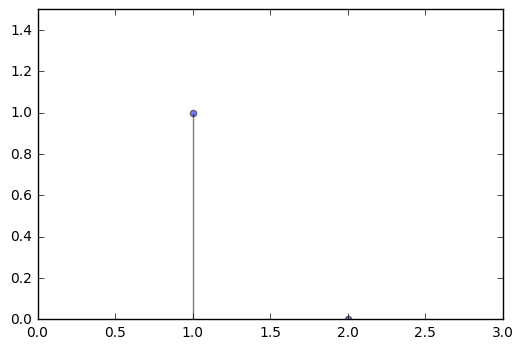

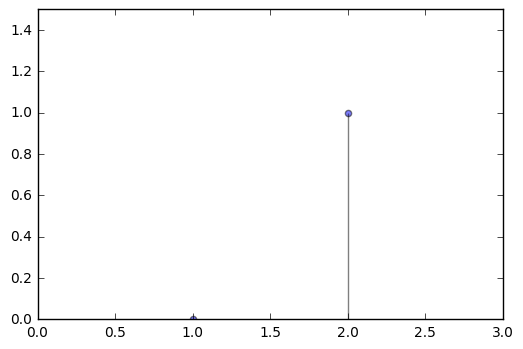

value of the game is  -2.22044604925e-16


In [24]:
#1.range of the optimal strategy consists of one point
a = np.array([[5,0],
              [6,0]])
main(a)

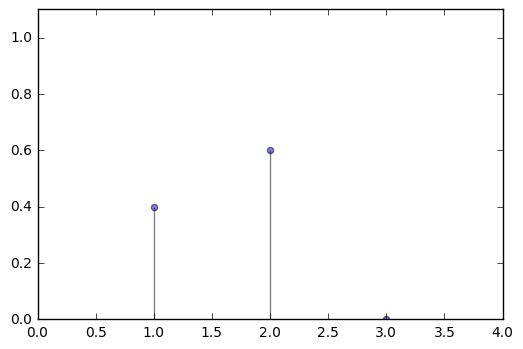

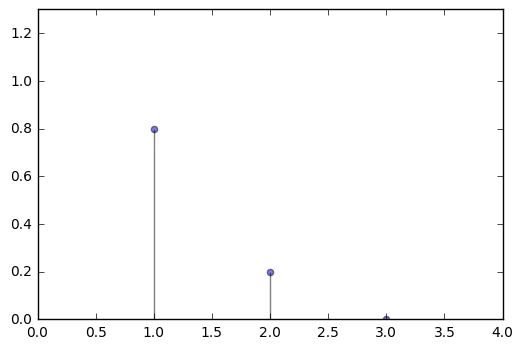

value of the game is  5.6


In [25]:
#2.range of the optimal strategy is incomplete
a = np.array([[5, 8, 10],
              [6, 4, 10],
              [0, 0, 0]])
main(a)

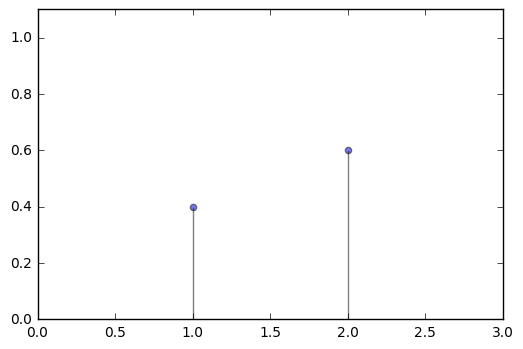

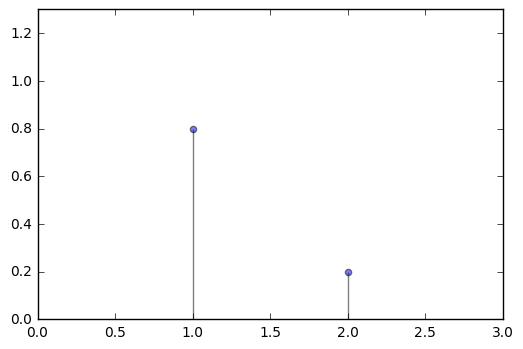

value of the game is  8.6


In [26]:
#3.full range of optimal strategy
a = np.array([[5, 8],
              [6, 4]])
main(a)